In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv("Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
types=visa_df.dtypes
cat_columns=[key for key,value in types.items() if value=='object']
num_columns=[key for key,value in types.items() if value!='object']

In [4]:
num_columns

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

**Boxplot**

- Box plot is used to identify the outliers
- Outlier is an observation having huge positive value or huge negative value
- Q1 = 25p, Q2=50p and Q3=75p
- IQR=Inter quartile range =Q3-Q1
- Q3+1.5*IQR and Q1-1.5*IQR

In [ ]:
           Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     
     flier             <----------->            fliers
                            IQR

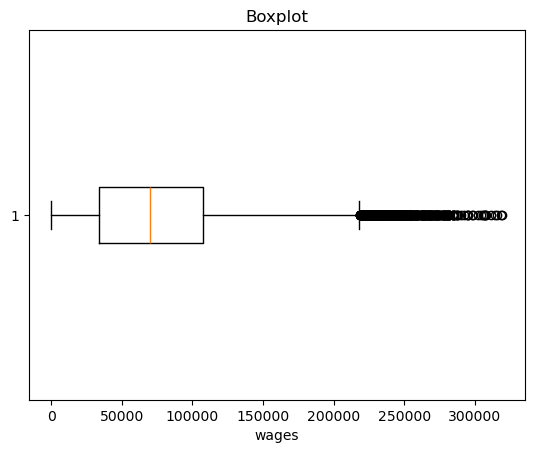

In [5]:
# Read the prevailing wage data and plot the box plot
wage_data=visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=False)
plt.title('Boxplot')
plt.xlabel('wages')
plt.show()

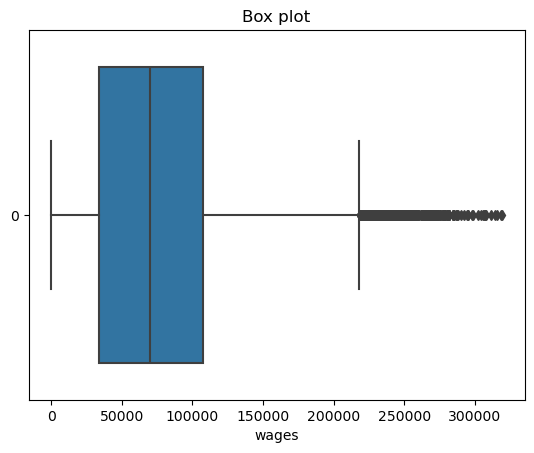

In [6]:
wage_data=visa_df['prevailing_wage']
sns.boxplot(wage_data,orient='h')
plt.title('Box plot')
plt.xlabel('wages')
plt.show()

**plot the histogram and boxplot side by side**

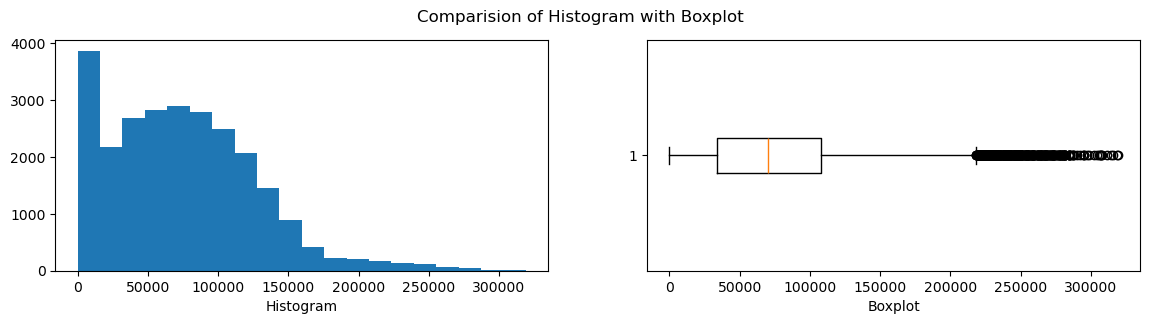

In [7]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(1,2,1)
plt.hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2)
plt.boxplot(wage_data,vert=False)
plt.xlabel('Boxplot')
plt.show()

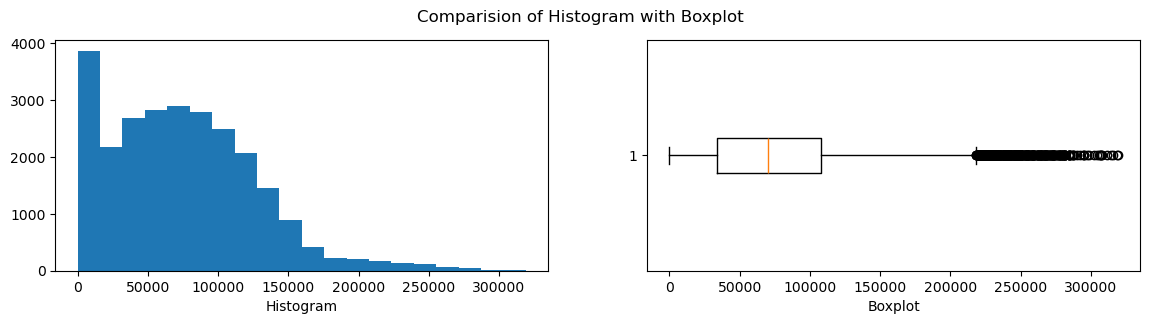

In [8]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(1,2,1).hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.xlabel('Boxplot')
plt.show()

**Finding the outliers**

- we already know that outliers availabel less than Q1-1.5*IQR and Q3+1.5*IQR
- step-1:
  - Calculate Q1=25p
  - Calculate Q2=50p
  - Calculate Q3=75p
- step-2:
  - Calculate IQR=Q3-Q1
- step-3:
  - Calculate LB=Q1-1.5*IQR
  - Calculate UB=Q3+1.5*IQR
- step-4:
  - con1=wage data<LB
  - con2=wage data>UB
  - con3=con1 or-and con2 (use bitwise operator)
- step-5:
  - Data[con3]

In [5]:
wage_data=visa_df['prevailing_wage']
Q1=np.percentile(wage_data,25)
Q2=np.percentile(wage_data,50)
Q3=np.percentile(wage_data,75)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
con1=wage_data<LB #T F
con2=wage_data>UB #T F
con3=con1|con2
# Bitwise operator used to compare
# Bits data===0 and 1==== True false
outliers_data=wage_data[con3]
outliers_data

14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [6]:
outliers_df=visa_df[con3]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


**Middle data**

In [7]:
wage_data=visa_df['prevailing_wage']
Q1=np.percentile(wage_data,25)
Q2=np.percentile(wage_data,50)
Q3=np.percentile(wage_data,75)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
con1=wage_data>LB #T F
con2=wage_data<UB #T F
con3=con1&con2
# Bitwise operator used to compare
# Bits data===0 and 1==== True false
# np.logical and(con1,con2)
non_outliers_df=visa_df[con3]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


- we have two dataframe
- Visa_df:Total data 25480
- non_outliers_df = After removing outliers 25053

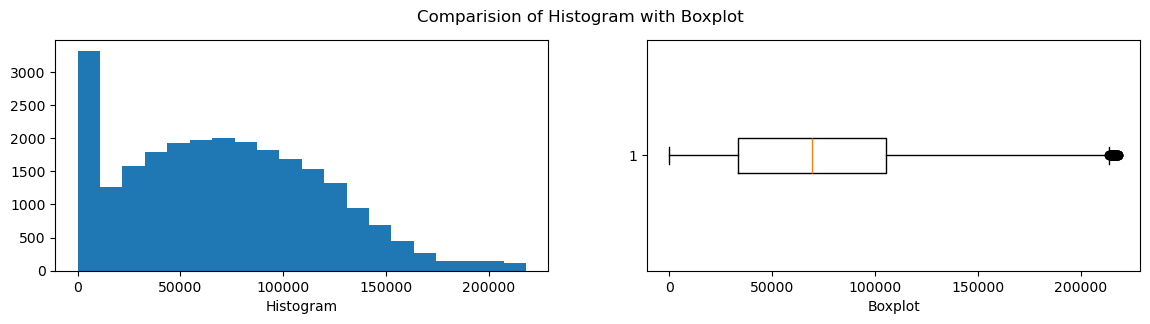

In [8]:
wage_data_non_outliers=non_outliers_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(1,2,1).hist(wage_data_non_outliers,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('Boxplot')
plt.show()

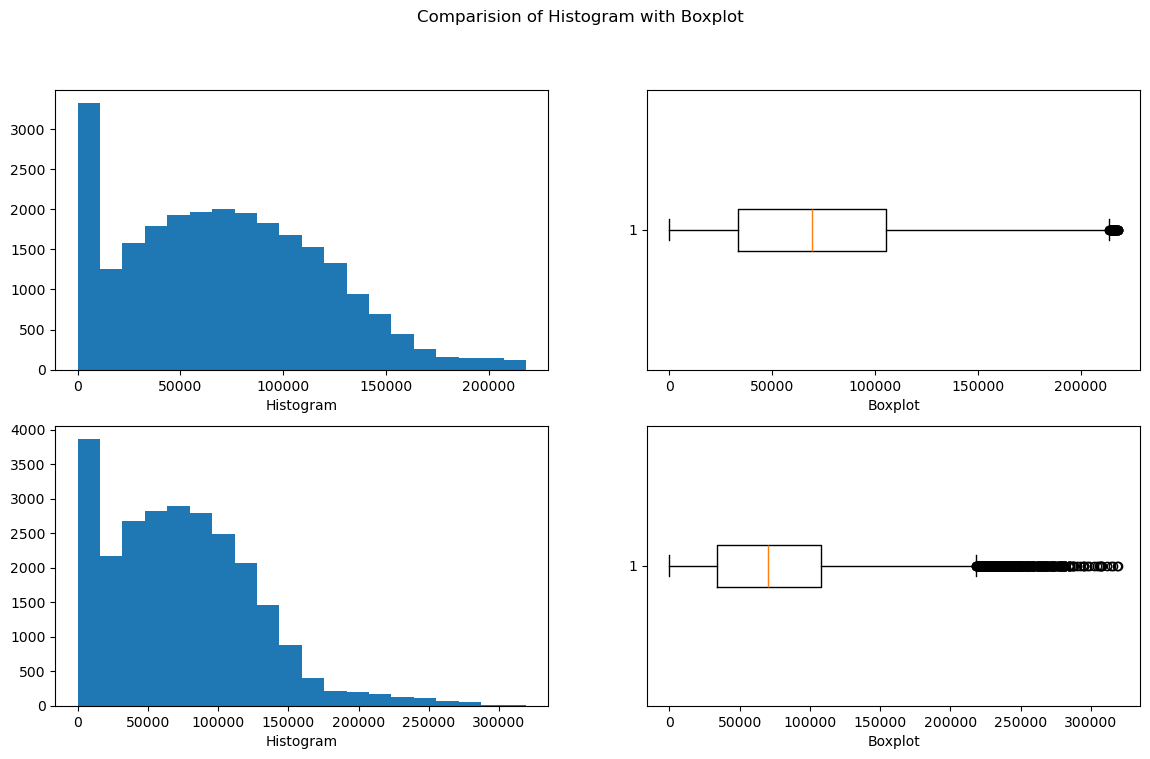

In [9]:
#################data#########################
wage_data_non_outliers=non_outliers_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']
################Non outliers#########################
plt.figure(figsize=(14,8))
plt.suptitle('Comparision of Histogram with Boxplot')
plt.subplot(2,2,1).hist(wage_data_non_outliers,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,2).boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('Boxplot')
##################Entire data######################
plt.subplot(2,2,3).hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,4).boxplot(wage_data,vert=False)
plt.xlabel('Boxplot')
plt.show()

In [16]:
# Fill the outliers of wage data with wage median
# 427 outliers
# 427 should replace with median value
# again draw the plots
wage_data=visa_df['prevailing_wage']
Q1=np.percentile(wage_data,25)
Q2=np.percentile(wage_data,50)
Q3=np.percentile(wage_data,75)
IQR=Q3-Q1
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
con1=wage_data<LB #T F
con2=wage_data>UB #T F
con3=con1|con2
# Bitwise operator used to compare
# Bits data===0 and 1==== True false
outliers_data=wage_data[con3].median
outliers_data

<bound method Series.median of 14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64>

In [17]:
outliers_df=visa_df[con3].median
outliers_df

<bound method DataFrame.median of          case_id      continent education_of_employee has_job_experience  \
14        EZYV15           Asia              Master's                  Y   
34        EZYV35           Asia              Master's                  N   
130      EZYV131  South America           High School                  N   
216      EZYV217           Asia              Master's                  Y   
221      EZYV222  North America             Doctorate                  Y   
...          ...            ...                   ...                ...   
25191  EZYV25192           Asia              Master's                  N   
25195  EZYV25196  North America              Master's                  Y   
25468  EZYV25469           Asia            Bachelor's                  N   
25469  EZYV25470  North America              Master's                  Y   
25476  EZYV25477           Asia           High School                  Y   

      requires_job_training  no_of_employees  yr_of_e

In [ ]:
or and

- or behaviour:
   - suppose we take two individual conditions
   - if any one True,the final is becomes True
- and behaviour:
   - suppose we take two individual conditions
   - both conditions should be True,the final is becomes True

In [ ]:
# Some exam
# age <35
# Degree
you can appear the exam if you have a degree or if less than 35 years old
A:age is 33 years education: Inter :appear
      True                  False    True
B:age is 37 years education: Degree
       False                True    True
C:age is 33 years education: Degree
      True                  True    True
D:age is 37 years education: Inter 
      False                  False    False

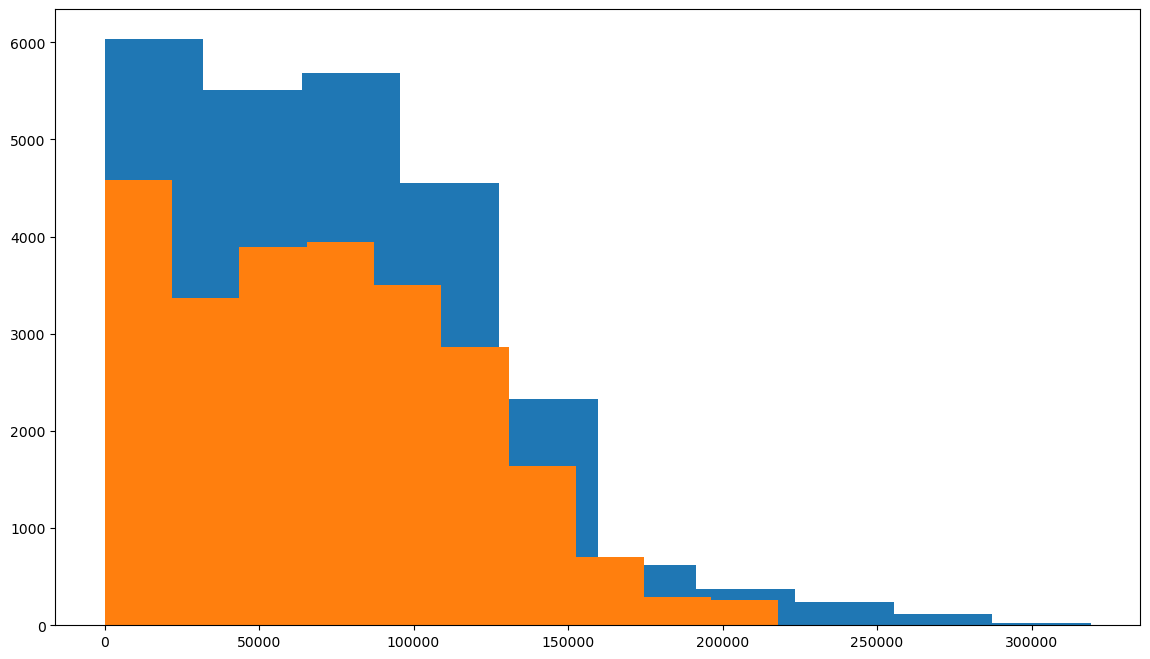

In [10]:
wage_data_non_outliers=non_outliers_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']
################Non outliers#########################
plt.figure(figsize=(14,8))
plt.hist(wage_data)
plt.hist(wage_data_non_outliers)
plt.show()

**How to deal the outliers**

- 1. We can drop the uotliers
    - Dropping outliers is an easy task,but not recomended
    - If you drop the outliers we are droping the rows
    - which means we are droping the other column values also
    - May be some important information we might loose from other column values
    - But in industry if outlier percentage less than 2% of the total data,we can drop
    - The number of outliers in pwage is 427
    - The number of total observations are 25480
    - The percentage is 1.67 which is less than 2%
- 2. Fill with Median value
    - We already know that outliers does not affect by median
    - so it is the best practice to fill the outliers with median
- 3. Capping or Florring
    - Instead of fill with median
    - We can fill with certain values
    - the outliers which are less than LB fill with LB value
    - the outliers which are greater than UB fill with UB value
- **Isolation Forest**
  - Is ML model used to find the Outliers and anamolies

**Fill with Median Value**

**np.where**

- In numpy we have method called where
- It takes three arguments
   - 1. Condition
   - 2. Value if Condition is True
   - 3. Value if Condition is False
- It is applicable for only Binary means if and else

In [15]:
#list1=[]
#for value in wage_data:
#    if value<LB or value>UB:
#        median=wage_data.median()
#        list1.append(median)
#    else:
#        list1.append(value)

In [14]:
dict1={'Sub':['DS','DE','CS'],
    'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,Sub,marks
0,DS,100
1,DE,200
2,CS,300


In [18]:
# Qn : I want to replace marks with 1,which are greater than 100
dict1={'Sub':['DS','DE','CS'],
    'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

l=[]
for i in df.marks:
    if i>100:
        l.append(1)
    else:
        l.append(i)
df['marks']=l
df

,Sub,marks
0,DS,100
1,DE,1
2,CS,1


In [21]:
# np.where(<condition>,<True>,<False>)
con=df['marks']>100
l=np.where(con,1,df['marks'])
df['marks']=l
df

,Sub,marks
0,DS,100
1,DE,1
2,CS,1


In [22]:
#Impletement for the outliers
wage_data=visa_df['prevailing_wage']
con1=wage_data<LB
con2=wage_data>UB
con=con1 | con2
wage_med=wage_data.median()
l=np.where(con,wage_med,wage_data)
l

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [25]:
visa_df['prevailing_wage_update']=l

(array([4580., 3368., 3890., 4369., 3507., 2860., 1643.,  706.,  295.,
         262.]),
 array([2.13670000e+00, 2.18113840e+04, 4.36206314e+04, 6.54298787e+04,
        8.72391260e+04, 1.09048373e+05, 1.30857621e+05, 1.52666868e+05,
        1.74476115e+05, 1.96285363e+05, 2.18094610e+05]),
 <BarContainer object of 10 artists>)

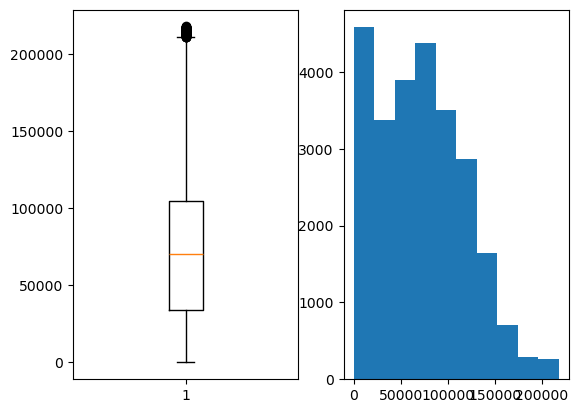

In [26]:
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage_update'])
plt.subplot(1,2,2).hist(visa_df['prevailing_wage_update'])

In [33]:
#I want to know how many applicants got Denied Visa per continent wise
con1=visa_df['case_status']=='Denied'
DF1=visa_df[con1][['continent','case_status']]
DF1

,continent,case_status
0,Asia,Denied
2,Asia,Denied
3,Asia,Denied
7,North America,Denied
11,Asia,Denied
...,...,...
25454,Asia,Denied
25459,Asia,Denied
25461,Asia,Denied
25462,Europe,Denied


In [35]:
# I want to know how many applicants got Certified Visa per continent wise
con2=visa_df['case_status']=='Certified'
DF2=visa_df[con2][['continent','case_status']]
DF2

,continent,case_status
1,Asia,Certified
4,Africa,Certified
5,Asia,Certified
6,Asia,Certified
8,Asia,Certified
...,...,...
25475,Asia,Certified
25476,Asia,Certified
25477,Asia,Certified
25478,Asia,Certified
